In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load dataset
wine = load_wine()

# Convert to DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add target column if you want (wine class)
df['target'] = wine.target

# See first 5 rows
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [2]:
# Compute correlation matrix (Pearson by default)
corr_matrix = df.corr()

# Display correlation matrix
print(corr_matrix)

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target                       -0.328222    0.437776 -0.049643   

                              alcalinit

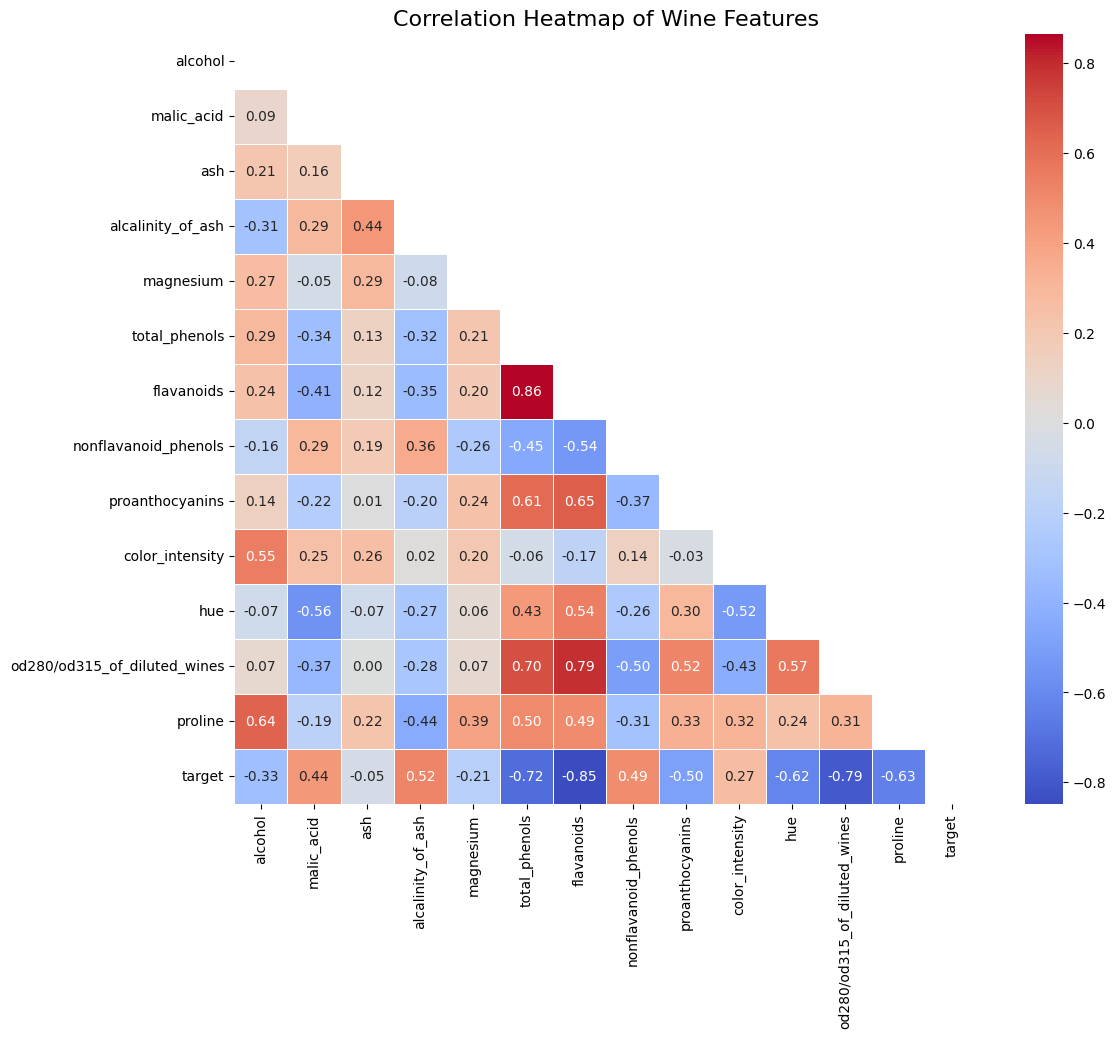

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Wine Features", fontsize=16)
plt.show()

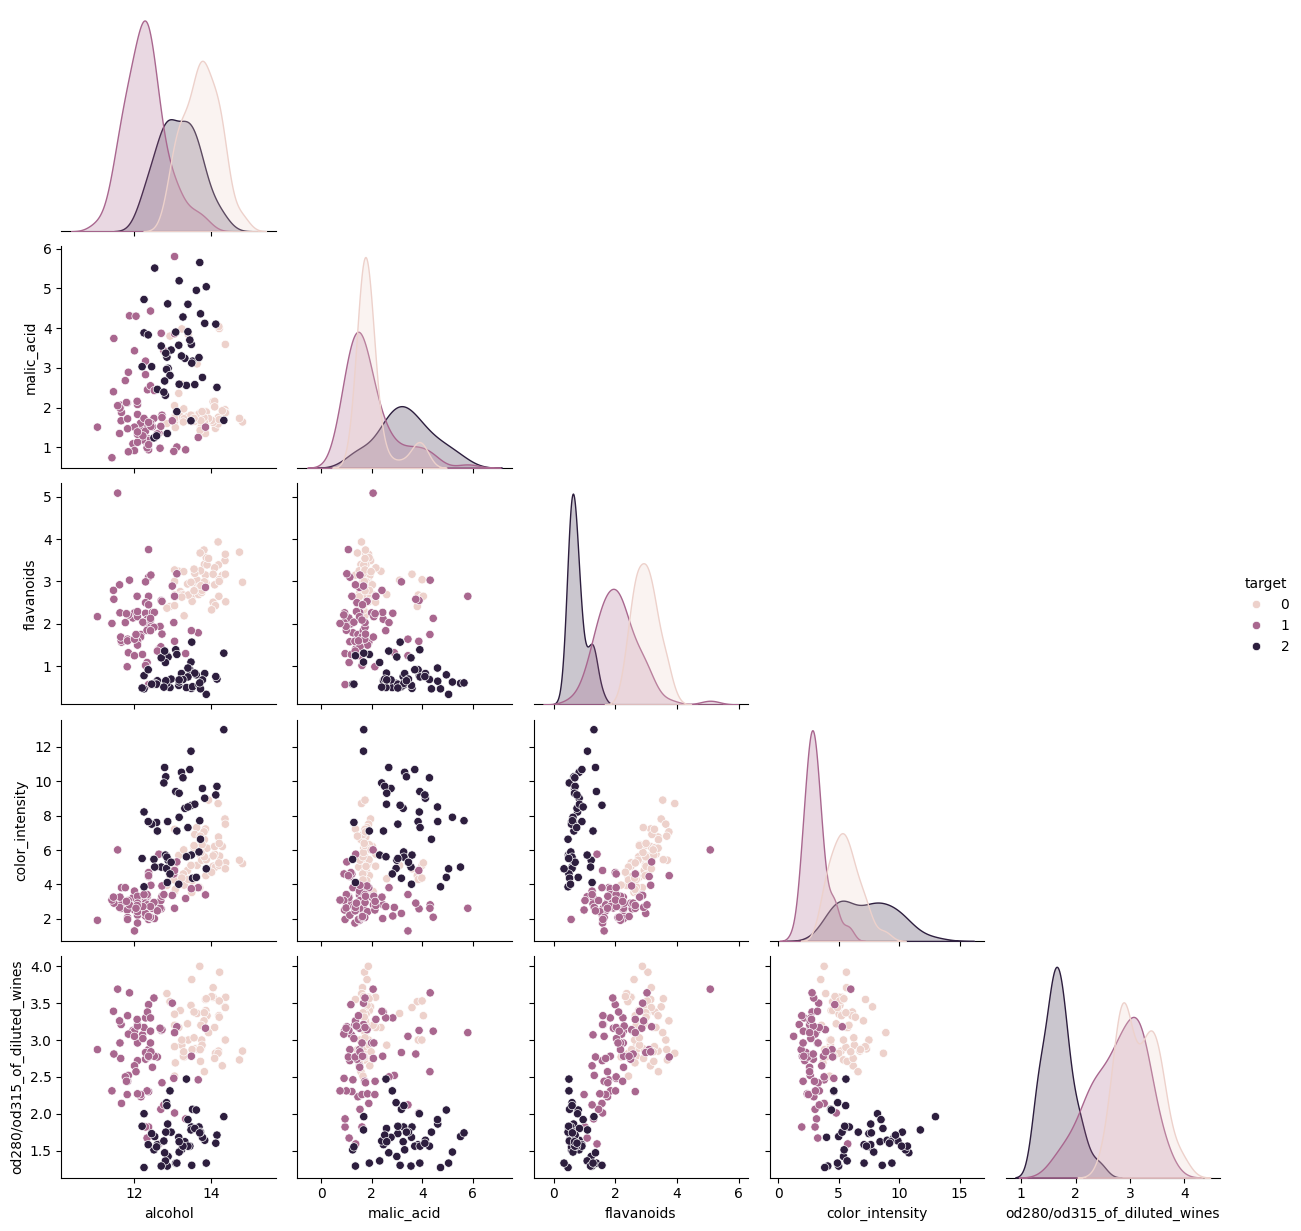

In [4]:
# Select key features (example: top correlated features with 'alcohol')
key_features = ['alcohol', 'malic_acid', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines']

# Pairplot with hue by wine type
sns.pairplot(df[key_features + ['target']], hue='target', corner=True, diag_kind='kde')
plt.show()

In [5]:
# Unstack correlations
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs != 1]

# Sort by absolute value
sorted_corr = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index)

# Show top 5 strongest correlations
print("Top 5 strongest correlations:")
print(sorted_corr.head(5))

# Show top 5 strongest negative correlations
print("\nTop 5 strongest negative correlations:")
print(sorted_corr.tail(5))

Top 5 strongest correlations:
total_phenols  flavanoids                      0.864564
flavanoids     total_phenols                   0.864564
target         flavanoids                     -0.847498
flavanoids     target                         -0.847498
target         od280/od315_of_diluted_wines   -0.788230
dtype: float64

Top 5 strongest negative correlations:
color_intensity               alcalinity_of_ash               0.018732
proanthocyanins               ash                             0.009652
ash                           proanthocyanins                 0.009652
                              od280/od315_of_diluted_wines    0.003911
od280/od315_of_diluted_wines  ash                             0.003911
dtype: float64
